# Tutorial: match_to_profile
This module performs match analysis to find genes or features that match a given phenotype best. For example, you could use this module to find genes whose expression levels match and oppose U46499_at [GLUTATHIONE S-TRANSFERASE, MICROSOMAL] gene expression for a given set of samples.

In this notebook we will use gene [GENE_NAME] as the profile

- http://datasets.genepattern.org/all_aml/all_aml_test.cls
- http://datasets.genepattern.org/all_aml/all_aml_test.gct

In [1]:
import genepattern
import cuzcatlan as cusca
import matplotlib.pyplot as plt

from cuzcatlan import match_to_profile
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(match_to_profile, name="Differential gene expression, continous pheotype.", 
                        description="Sort genes according to their association with a continuous phenotype or class vector.",
                        parameters={
                            "phenotype_input_method":{"description":"Select from the dropdown the type of input you have provided",
                                                      "default": "Index",
                                                      "choices":{'CLS --> Fill out the "phenotype file" parameter':"CLS",
                                                                 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters':"Name",
                                                                 'Index --> Fill out the "name of phenotype to match" parameter with value of index':"Index"
                                                                }
                                                     },
                            "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'custom_pearson_corr':"custom_pearson_corr",
                                                                 'compute_information_coefficient':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a continuous phenotype or class vector.', function_import='match_to_profile', name='Differential gene expression, continous pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'choices': []}, {'name': 'phenotype_input_method', 'label': 'phenotype_input_method', 'optional': False, 'default': 'Index', 'description': 'Select from the dropdown the type of input you have provided', 'hide': False, 'choices': {'CLS --> Fill out the "phenotype file" parameter': 'CLS', 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters': 'Name', 'Index --> Fill out the "name of phenotype to match" parameter with value of index': 'Index'}}, {'name': 'phenotypes_file', 'label': 'phenotypes_file', 'optional': True, 'default': None, 'description': 'Type the file name of the CLS file where the phenotypes are listed', 'hide': False, 'choices': []}, {'name': 'phenotype_column', 'label': 'phenotype_column', 'optional': True, 'default': None, 'description': 'The column name in the GCT file where the gene name is present', 'hide': False, 'choices': []}, {'name': 'name_of_phenotype_to_match', 'label': 'name_of_phenotype_to_match', 'optional': True, 'default': None, 'description': 'The row/gene names the phenotype to match', 'hide': False, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': True, 'default': None, 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': True, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'choices': {'custom_pearson_corr': 'custom_pearson_corr', 'compute_information_coefficient': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': None, 'description': 'The title of the heatmap', 'hide': False, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x105e96e18> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 100 permutations ...
	1/100 ...
	11/100 ...
	21/100 ...
	31/100 ...
	41/100 ...
	51/100 ...
	61/100 ...
	71/100 ...
	81/100 ...
	91/100 ...
	100/100 - done.


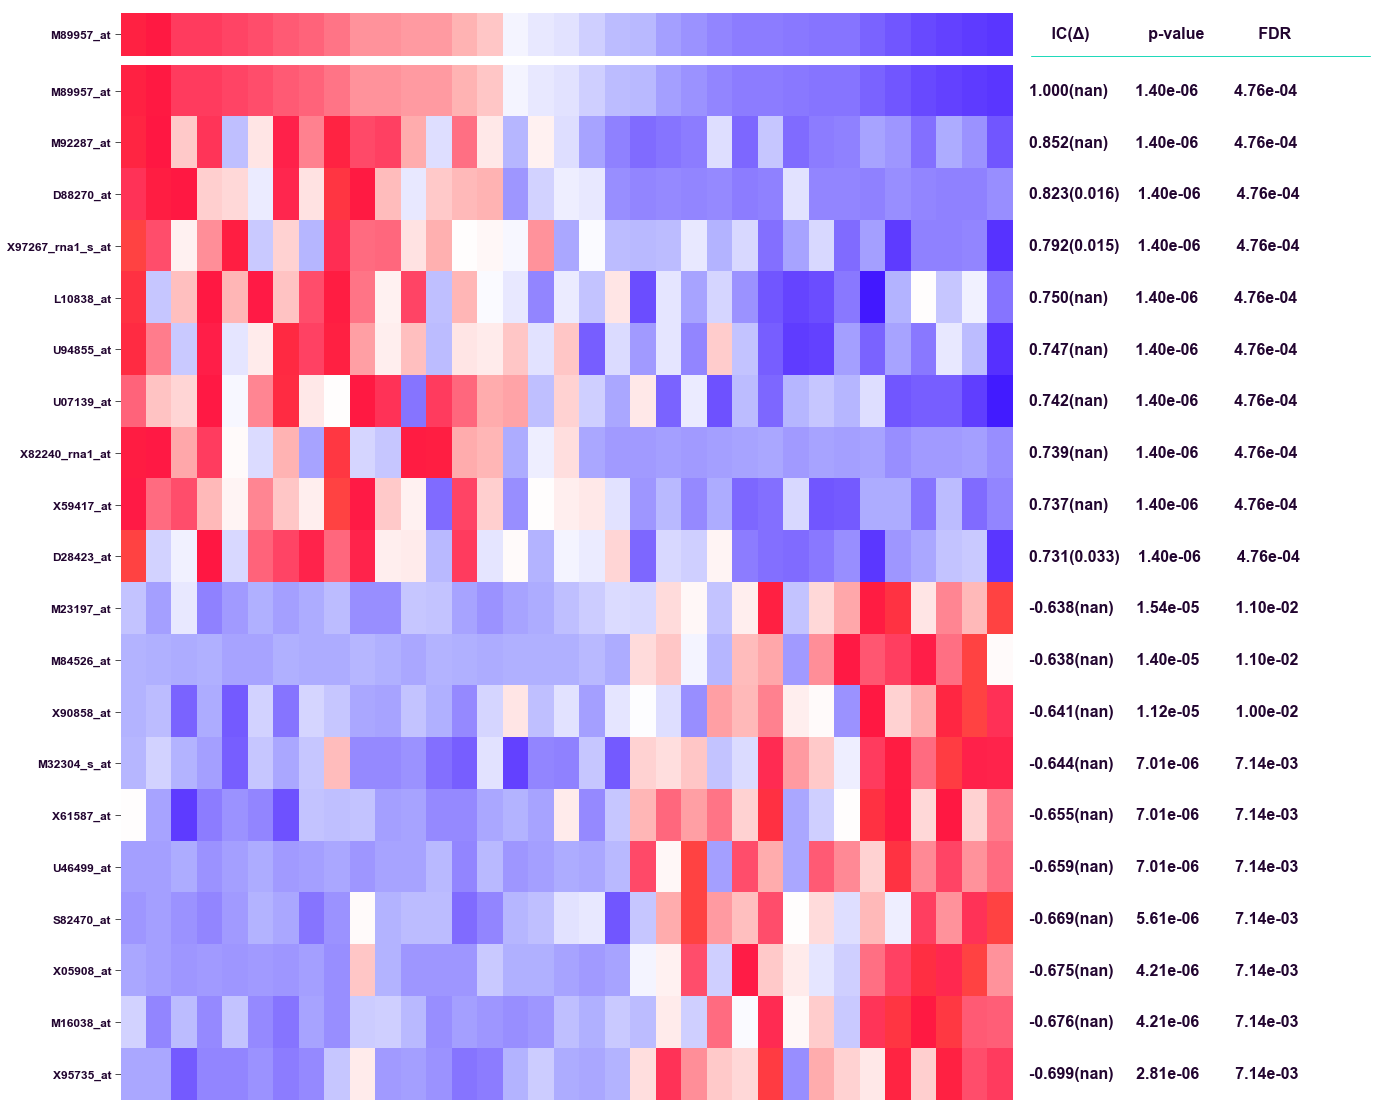

In [3]:
temp = match_to_profile(gene_expression="all_aml_test.gct", phenotype_input_method="Index", phenotypes_file="", phenotype_column="", name_of_phenotype_to_match="M89957_at", output_filename="", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=100, title="", random_seed=20121020)

In [3]:
temp

,Score,0.95 MoE,p-value,FDR
Name,,,,
M89957_at,1.000000,NaN,0.000014,0.002083
M92287_at,0.852470,NaN,0.000014,0.002083
D88270_at,0.823380,0.0164899,0.000014,0.002083
X97267_rna1_s_at,0.792488,0.014895,0.000014,0.002083
L10838_at,0.749599,NaN,0.000014,0.002083
U94855_at,0.746568,NaN,0.000014,0.002083
U07139_at,0.741542,NaN,0.000014,0.002083
X82240_rna1_at,0.738627,NaN,0.000014,0.002083
X59417_at,0.736922,NaN,0.000014,0.002083


# Comparing to regular DE

In [2]:
from cuzcatlan import differential_gene_expression

genepattern.GPUIBuilder(differential_gene_expression, name="Differential gene expression, binary pheotype.", 
                        description="Sort genes according to their association with a CLS file.")

GPUIBuilder(description='Sort genes according to their association with a CLS file.', function_import='differential_gene_expression', name='Differential gene expression, binary pheotype.', params=[{'name': 'phenotypes', 'label': 'phenotypes', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'choices': []}, {'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': '', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'choices': []}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': None, 'description': 'The title of the heatmap', 'hide': False, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'choices': []}])

In [12]:
de_results = differential_gene_expression(phenotypes="all_aml_test.cls", gene_expression="all_aml_test.gct", output_filename="de", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="DE", random_seed=20121020)

Index(['ALL 19769 TA+ Norel', 'ALL 406 TA+ (ML) Norel', 'ALL 4466 Norel',
       'ALL 1245 TA- Norel', 'ALL 16125 TA- Norel', 'ALL 23368 TA- Norel',
       'ALL R28 (ML) Relap', 'ALL 1234 ML', 'ALL 1305 ML', 'ALL 1421 ML',
       'ALL 1425 ML', 'ALL 1486 ML', 'ALL 1457 ML', 'ALL 1256 TA+ (ML) Norel',
       'ALL 1275 TA+ (ML) Norel', 'ALL 1101 TA- (ML) Norel',
       'ALL 1319 TA- (ML) Norel', 'ALL 522 TA- (ML) Norel', 'ALL SH 6',
       'ALL SH 12', 'ALL SH 15', 'AML 15 (PK) Norel', 'AML 19 (PK) Norel',
       'AML 10 (PK) Relap', 'AML 9 (PK) Relap', 'AML SH 5', 'AML SH 13',
       'AML SH 14', 'AML SH 16', 'AML SH 18', 'AML 17 ML', 'AML 25 ML',
       'AML 11 (ML)', 'AML 12 (ML)', 'AML 5 (ML) Relap'],
      dtype='object')
Index(['ALL 19769 TA+ Norel', 'ALL 406 TA+ (ML) Norel', 'ALL 4466 Norel',
       'ALL 1245 TA- Norel', 'ALL 16125 TA- Norel', 'ALL 23368 TA- Norel',
       'ALL R28 (ML) Relap', 'ALL 1234 ML', 'ALL 1305 ML', 'ALL 1421 ML',
       'ALL 1425 ML', 'ALL 1486 ML', 'ALL 

In [13]:
de_results

,Score,0.95 MoE,p-value,FDR
Name,,,,
U46499_at,0.824544,NaN,0.000014,0.002381
X95735_at,0.775671,NaN,0.000014,0.002381
M63959_at,0.769661,NaN,0.000014,0.002381
L09209_s_at,0.747575,NaN,0.000014,0.002381
M84526_at,0.740053,NaN,0.000014,0.002381
X17042_at,0.731650,NaN,0.000014,0.002381
M14636_at,0.726834,NaN,0.000014,0.002381
M22960_at,0.726074,NaN,0.000014,0.002381
U59878_at,0.720990,NaN,0.000014,0.002381


In [14]:
import numpy as np
def map_df1_to_df2(df_1, df_2, Feature='Feature', Rank='Rank'):
    to_return = df_1.copy()
    df_2_copy = df_2.copy()
    
    to_return.sort_values(by=Rank, inplace=True)
    to_return.set_index(Feature, inplace=True)
    df_2_copy.sort_values(by=Rank, inplace=True)
    df_2_copy.set_index(Feature, inplace=True)
    
    df_2_copy.rename(columns={Rank: 'new_Rank'}, inplace=True)
    to_return_2 = to_return.join(df_2_copy)
    
    return to_return_2

def compare_ranks(df_a, df_b, number_of_genes=5, verbose=False, Feature='Feature', Rank='Rank'):
    # Not ssuming both df's are ranked already!
    subset_a = df_a.head(number_of_genes)[[Feature, Rank]]
    subset_b = df_b.head(number_of_genes)[[Feature, Rank]]

    a_in_b = map_df1_to_df2(subset_a, df_b[[Feature,Rank]])
    b_in_a = map_df1_to_df2(subset_b, df_a[[Feature,Rank]]) 

    metric_1 = custom_metric(a_in_b[Rank], a_in_b['new_Rank'])
    metric_2 = custom_metric(b_in_a[Rank], b_in_a['new_Rank'])
    
    if verbose:
        print(a_in_b) 
        print(b_in_a)
        
    return (metric_1 + metric_2)/2

def compare_multiple_ranks(df_a, df_b, max_number_of_genes=10, verbose=False, Feature='Feature', Rank='Rank'):

    # This is the largest subset we will consider
    subset_a = df_a.head(max_number_of_genes)[[Feature, Rank]]
    subset_b = df_b.head(max_number_of_genes)[[Feature, Rank]]
    
    df_a_to_use = df_a[[Feature,Rank]]
    df_b_to_use = df_b[[Feature,Rank]]
    
    indexes = []
    metrics = []
    for i in range(max_number_of_genes, 0, -1):
        
        if i == max_number_of_genes:
            subset_a_to_use = subset_a
            subset_b_to_use = subset_b
        else:
            subset_a_to_use = subset_a_to_use.drop(subset_a_to_use.index[i])
            subset_b_to_use = subset_b_to_use.drop(subset_b_to_use.index[i])

        a_in_b = map_df1_to_df2(subset_a_to_use, df_b_to_use, Feature='Feature', Rank='Rank')
        b_in_a = map_df1_to_df2(subset_b_to_use, df_a_to_use) 

        metric_1 = custom_metric(a_in_b[Rank], a_in_b['new_Rank'])
        metric_2 = custom_metric(b_in_a[Rank], b_in_a['new_Rank'])
        
        indexes.append(i)
#         print(i, metric_1, metric_2)
        metrics.append((metric_1 + metric_2)/2)
    
    if verbose:
        print('Depreciated!')
        
    return indexes, metrics

def custom_metric(list_1, list_2):
    temp = list_1 - list_2
    temp.fillna(len(temp), inplace=True)
    # Metric is 0 if perfect overlap, 1 if list are reversed. It can be larger than one!
    return sum(abs(temp))/ np.floor(list_1.shape[0]**2/2)

In [15]:
cont = temp.copy()
cont['Feature'] = cont.index
cont['abs_Score'] = abs(cont['Score'])
cont.sort_values(by='abs_Score', ascending=False, inplace=True)
cont.reset_index(inplace=True)
cont['Rank'] = cont.index +1

dist = de_results.copy()
dist['Feature'] = dist.index
dist['abs_Score'] = abs(dist['Score'])
dist.sort_values(by='abs_Score', ascending=False, inplace=True)
dist.reset_index(inplace=True)
dist['Rank'] = dist.index +1

/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in double_scalars


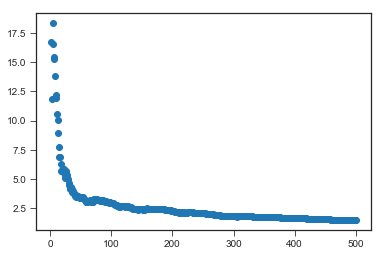

In [17]:

ixs, mets = compare_multiple_ranks(cont, dist, max_number_of_genes=500)
plt.clf()
plt.scatter(ixs,mets)
plt.show()

In [18]:
cont.head()

,Name,Score,0.95 MoE,p-value,FDR,Feature,abs_Score,Rank
0,M89957_at,1.000000,NaN,0.000014,0.002083,M89957_at,1.000000,1
1,M92287_at,0.852470,NaN,0.000014,0.002083,M92287_at,0.852470,2
2,D88270_at,0.823380,0.0164899,0.000014,0.002083,D88270_at,0.823380,3
3,X97267_rna1_s_at,0.792488,0.014895,0.000014,0.002083,X97267_rna1_s_at,0.792488,4
4,L10838_at,0.749599,NaN,0.000014,0.002083,L10838_at,0.749599,5


In [55]:
dist.head()

,Name,Score,0.95 MoE,p-value,FDR,Feature,abs_Score,Rank
0,U46499_at,0.824544,NaN,0.000014,0.002381,U46499_at,0.824544,1
1,X95735_at,0.775671,NaN,0.000014,0.002381,X95735_at,0.775671,2
2,M89957_at,-0.775614,NaN,0.000014,0.002273,M89957_at,0.775614,3
3,M63959_at,0.769661,NaN,0.000014,0.002381,M63959_at,0.769661,4
4,L09209_s_at,0.747575,NaN,0.000014,0.002381,L09209_s_at,0.747575,5
